#Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#Import kaggle 

In [2]:
pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alpiansyahrizqi","key":"4ec2871806d4a125d51415bdc1e5a75a"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 74.9MB/s]


In [6]:
local_zip = '/content/diabetes-health-indicators-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

#Import Dataset

In [7]:
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#EXPLORATORY DATA ANALYSIS (EDA) & DATA CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

Melihat korelasi antar column

Text(0.5, 1.0, 'Correlation Matrix')

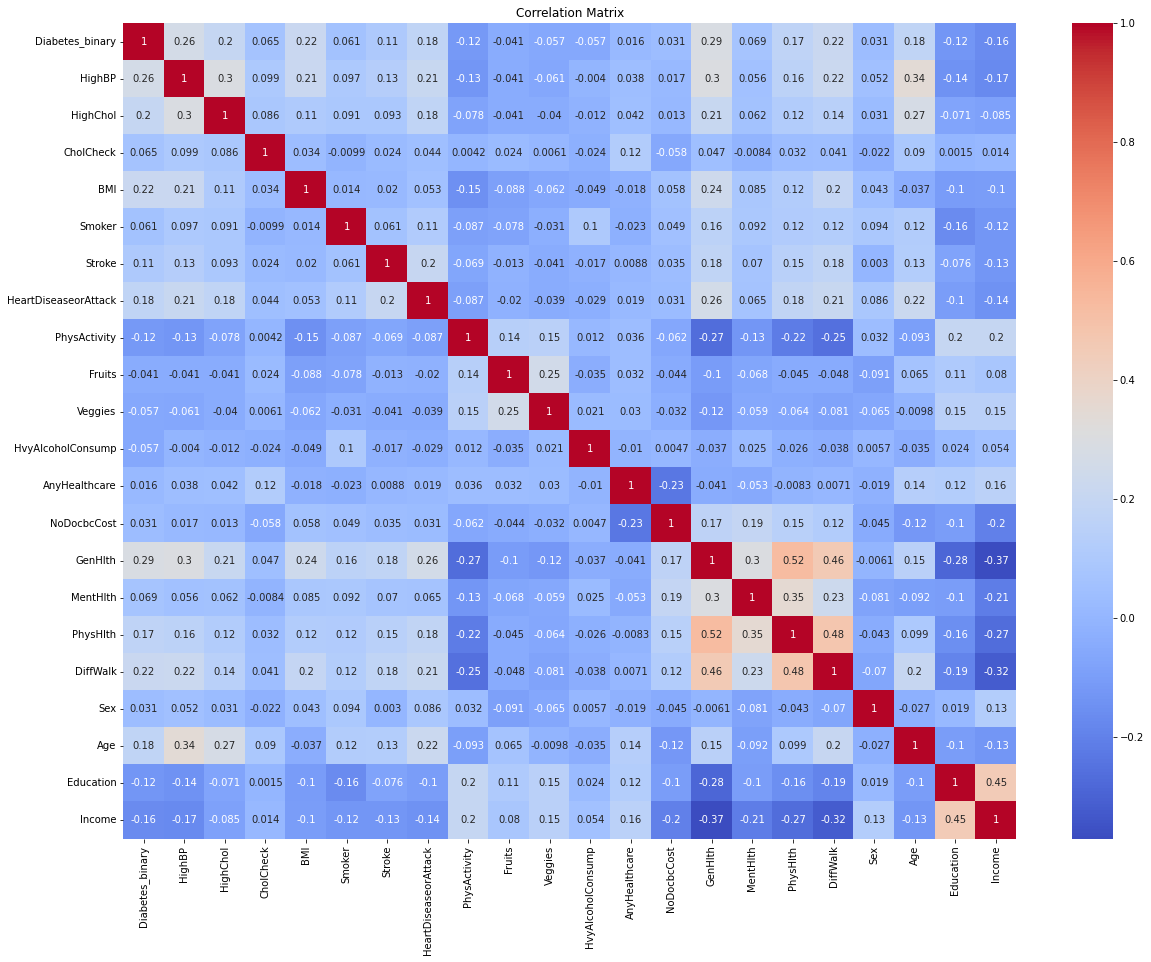

In [12]:
plt.figure(figsize=(20, 15))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

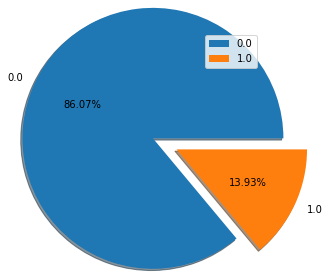

In [13]:
plt.pie(df["Diabetes_binary"].value_counts(),labels = df["Diabetes_binary"].unique(),autopct = "%.2f%%",shadow=True,explode=(0,0.3),radius=1.5)
plt.legend()
plt.show()

dari piechart didapatkan 86.07% tidak mengidap diabetes dan 13.93 mengidap diabetes

Distribusi setiap variable yang ada di dalam dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40d89e1ad0>,
      dtype=object)

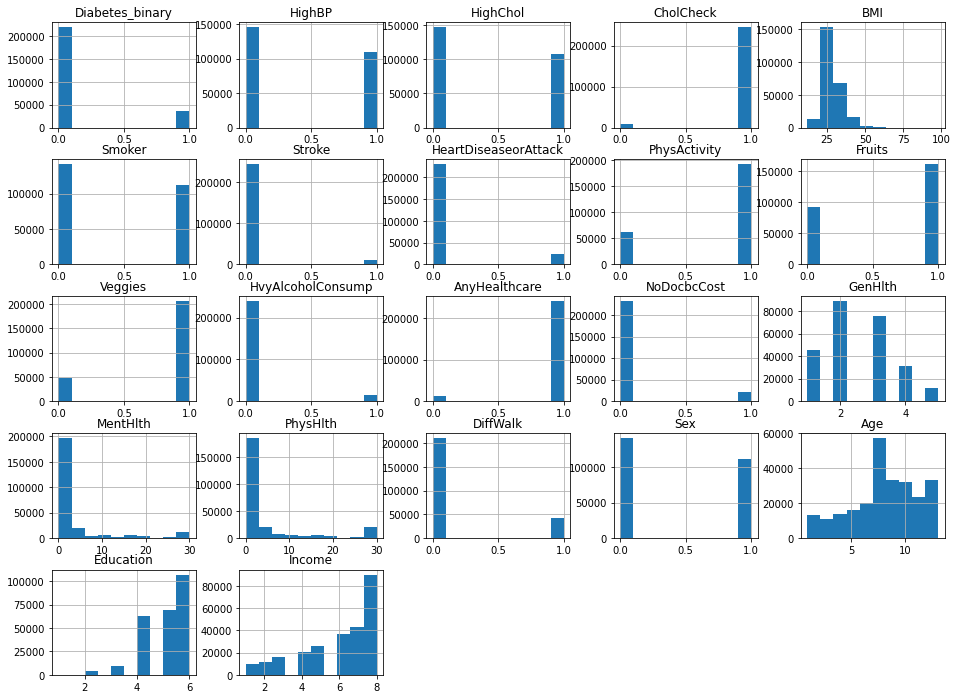

In [14]:
df.hist(figsize=(16,12))

disini saya menggunakan pairplot untuk melihat grafik mana yang memiliki kesamaan sehingga akan mempermudah untuk melakukan prediksi

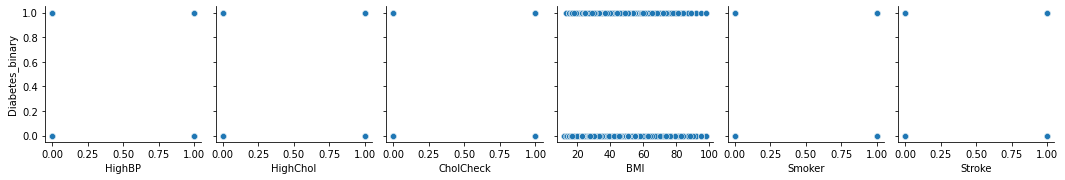

In [15]:
sns.pairplot(df,x_vars=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke'],y_vars=['Diabetes_binary'])

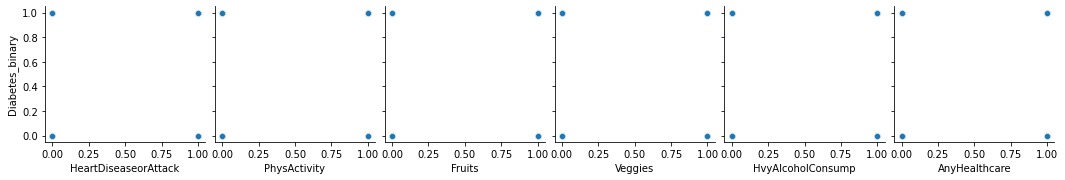

In [16]:
sns.pairplot(df,x_vars=['HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare'],y_vars=['Diabetes_binary'])


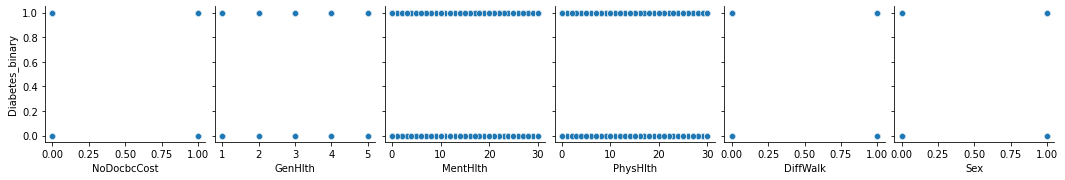

In [17]:
sns.pairplot(df,x_vars=['NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex'],y_vars=['Diabetes_binary'])

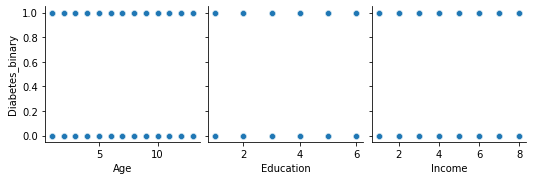

In [18]:
sns.pairplot(df,x_vars=['Age','Education','Income'],y_vars=['Diabetes_binary'])

Mengecek value setiap column apakah ada data outlier

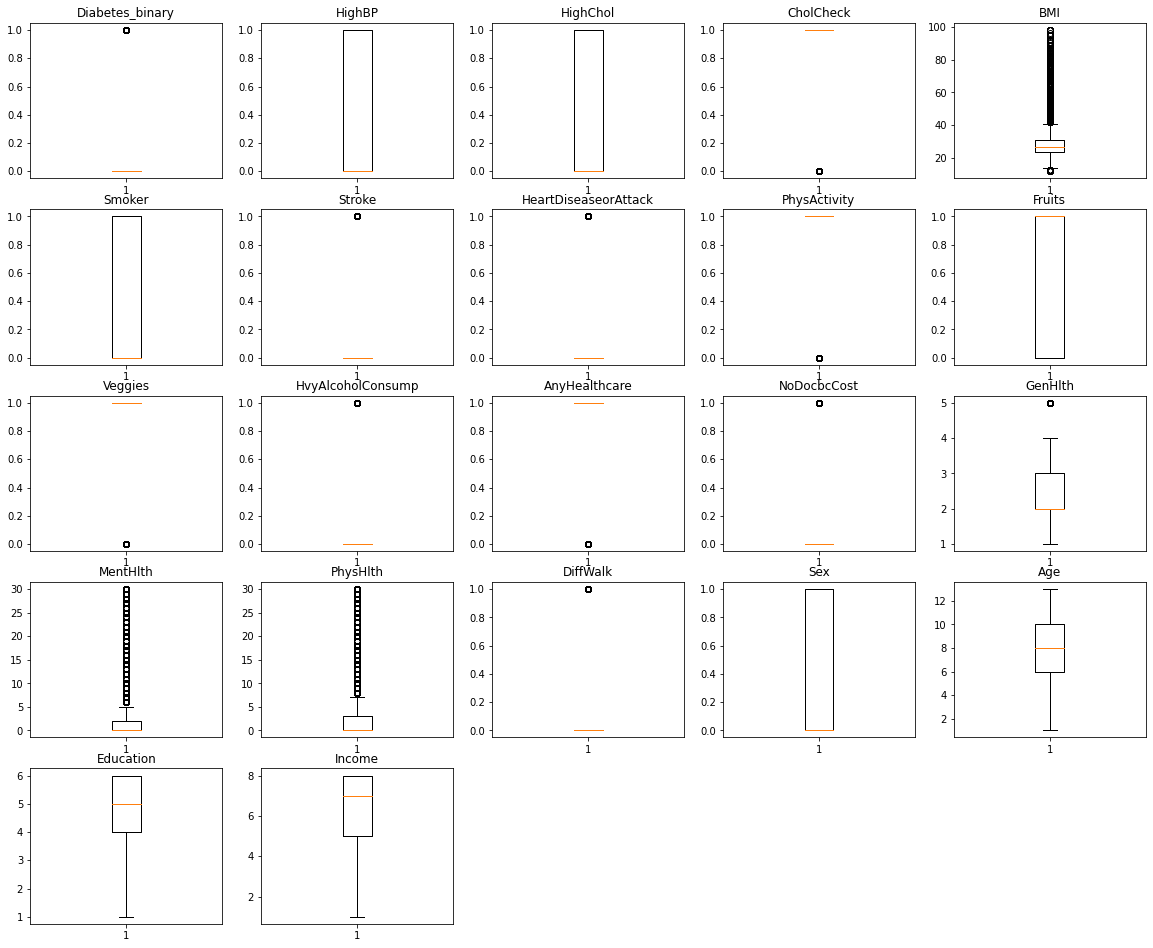

In [19]:
px = 1
plt.figure(figsize=(20,20))
for i in ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education','Income']:
    if px<23:
        plt.subplot(6,5,px)
        plt.boxplot(df[i])
        plt.title(i)
        px=px+1

In [20]:
def outlier():
    l = [ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]   
        lof = x[0]-1.5*iqr   
        upf = x[1]+1.5*iqr   
        df[i] = np.where(df[i]>upf,upf,(np.where(df[i]<lof,lof,df[i])))
outlier()

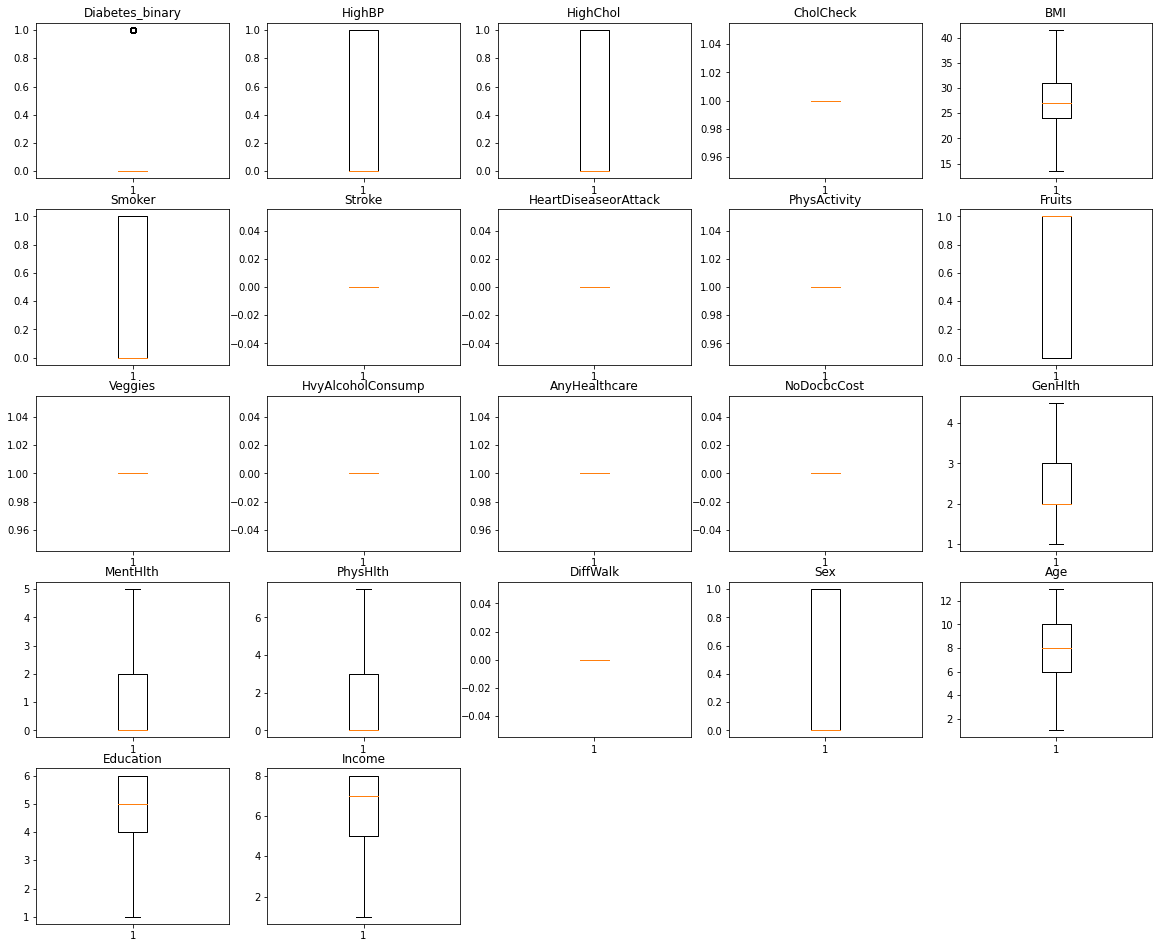

In [21]:
px = 1
plt.figure(figsize=(20,20))
for i in ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education','Income']:
    if px<23:
        plt.subplot(6,5,px)
        plt.boxplot(df[i])
        plt.title(i)
        px=px+1

Melakukan drop pada beberapa column karena memiliki relasi yang tidak begitu baik dengan variable diabetes_binary. hal ini ditujukan agar dapat meningkatkan score prediksi

In [22]:
df = df.drop(columns=['CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','MentHlth','Sex'])

#Data preperation 


disini saya akan melakukan Data preperation sehingga data tersebut dapat di training dan akan menghasilkan hasil prediksi yang baik

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

## Normalize

In [24]:
abs_scaler = MaxAbsScaler()
abs_scaler.fit(df)
scaled_data = abs_scaler.transform(df)
df_scaled = pd.DataFrame(scaled_data, columns = df.columns)
df_scaled.describe()

,Diabetes_binary,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.0,253680.0,253680.0,253680.000000,253680.000000,253680.0,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.677283,0.0,0.0,1.0,0.552796,0.246790,0.0,0.617855,0.841739,0.756734
std,0.346294,0.494934,0.494210,0.134028,0.0,0.0,0.0,0.226019,0.384961,0.0,0.234940,0.164296,0.258893
min,0.000000,0.000000,0.000000,0.325301,0.0,0.0,1.0,0.222222,0.000000,0.0,0.076923,0.166667,0.125000
25%,0.000000,0.000000,0.000000,0.578313,0.0,0.0,1.0,0.444444,0.000000,0.0,0.461538,0.666667,0.625000
50%,0.000000,0.000000,0.000000,0.650602,0.0,0.0,1.0,0.444444,0.000000,0.0,0.615385,0.833333,0.875000
75%,0.000000,1.000000,1.000000,0.746988,0.0,0.0,1.0,0.666667,0.400000,0.0,0.769231,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [25]:
y = df_scaled['Diabetes_binary']
X = df_scaled.drop(columns=['Diabetes_binary'])
X

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,1.0,1.0,0.963855,0.0,0.0,1.0,1.000000,1.000000,0.0,0.692308,0.666667,0.375
1,0.0,0.0,0.602410,0.0,0.0,1.0,0.666667,0.000000,0.0,0.538462,1.000000,0.125
2,1.0,1.0,0.674699,0.0,0.0,1.0,1.000000,1.000000,0.0,0.692308,0.666667,1.000
3,1.0,0.0,0.650602,0.0,0.0,1.0,0.444444,0.000000,0.0,0.846154,0.500000,0.750
4,1.0,1.0,0.578313,0.0,0.0,1.0,0.444444,0.000000,0.0,0.846154,0.833333,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.000000,0.0,0.0,1.0,0.666667,0.666667,0.0,0.384615,1.000000,0.875
253676,1.0,1.0,0.433735,0.0,0.0,1.0,0.888889,0.000000,0.0,0.846154,0.333333,0.500
253677,0.0,0.0,0.674699,0.0,0.0,1.0,0.222222,0.000000,0.0,0.153846,0.833333,0.250
253678,1.0,0.0,0.554217,0.0,0.0,1.0,0.666667,0.000000,0.0,0.538462,0.833333,0.125


In [26]:
y.value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

#Model Development dan Evaluasi Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Logisticregresi

In [29]:
logisticRegressionModel = LogisticRegression().fit(X_train, y_train)
y_pred = logisticRegressionModel.predict(X_test)
print('mse:',mean_squared_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r^2:',r2_score(y_test,y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))


mse: 0.13708215074109115
rmse: 0.37024606782664304
r^2: -0.13615215465434471
accuracy score: 0.8629178492589089


DecisionTreeClassifier

In [30]:
treeModel = DecisionTreeClassifier(min_samples_split = 60).fit(X_train, y_train)
y_pred_tree = treeModel.predict(X_test)
print('mse:',mean_squared_error(y_test,y_pred_tree))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred_tree)))
print('r^2:',r2_score(y_test,y_pred_tree))
print('accuracy score:',accuracy_score(y_test, y_pred_tree))


mse: 0.1418519394512772
rmse: 0.37663236644143744
r^2: -0.17568469547768784
accuracy score: 0.8581480605487228


RandomForestClassifier

In [31]:
forestModel = RandomForestClassifier(min_samples_split = 60).fit(X_train, y_train)
y_pred_forest = forestModel.predict(X_test)
print('mse:',mean_squared_error(y_test,y_pred_forest))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred_forest)))
print('r^2:',r2_score(y_test,y_pred_forest))
print('accuracy score:',accuracy_score(y_test, y_pred_forest))

mse: 0.13538710186061179
rmse: 0.3679498632430943
r^2: -0.12210340047745416
accuracy score: 0.8646128981393882


In [32]:
bayesModel = GaussianNB().fit(X_train, y_train)
y_pred_bayes = bayesModel.predict(X_test)
print('mse:',mean_squared_error(y_test,y_pred_bayes))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred_bayes)))
print('r^2:',r2_score(y_test,y_pred_bayes))
print('accuracy score:',accuracy_score(y_test, y_pred_bayes))

mse: 0.18186297697887102
rmse: 0.42645395645822193
r^2: -0.5073006370949875
accuracy score: 0.818137023021129


dari hasil yang didapat dengan dataset yang sudah saya bersihkan paling baik menggunakan RandomForestClassifier dengan score 0.8646128981393882